In [1]:
import geopandas as gpd
from tqdm import tqdm
from shapely.validation import explain_validity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import calendar
from itertools import cycle

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
os.chdir("../../scripts")
from clustering_operations import *

%load_ext autoreload
%autoreload 2

In [3]:
file = "../data/shapefiles/FAPAN_level_07/FAPAN_level_07_inclusive.shp"    

# open file
shp = gpd.read_file(file)
df = pd.read_csv("../data/FAPAN_level_07.csv")

In [4]:
df

,HYBAS_ID,SUBIDs,1,2,3,4,5,6,7,8,...,195,196,197,198,199,200,201,202,203,204
0,2070000010,9000340.0,-1.479092,-1.461161,-1.453289,-1.481299,-1.449651,-1.545862,-1.579616,-1.687005,...,1.655333,1.592781,0.853791,1.173939,1.140341,1.228164,1.138968,0.679221,1.044652,1.435165
1,2070000020,"9713800.0,9714060.0,9713811.0,9000340.0,900034...",-1.322753,-0.781449,-1.047273,-1.703376,-1.276926,-1.180634,-1.538944,-1.531854,...,0.404243,0.260235,0.599397,1.216978,0.375715,-0.147517,-0.201637,-0.408996,0.149820,0.526136
2,2070000030,"9714184.0,9714057.0,9714060.0,9713809.0,971381...",-1.525035,-1.113620,-1.350137,-1.613114,-1.410301,-1.400624,-1.571780,-1.620268,...,1.460454,1.235448,0.879883,1.515541,1.158499,0.869266,0.876306,0.564344,1.104095,1.402583
3,2070000240,"9749824.0,9750124.0,9750135.0,9749914.0,974997...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2070816790,"9749893.0,9750135.0,9714184.0,9714057.0,974989...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4057,2070099470,"9715425.0,9621857.0,9714987.0,9715442.0,971557...",-1.222142,-0.711898,-0.088376,-1.146354,-0.838684,-0.836202,-0.209959,0.100777,...,1.198548,2.198667,2.341377,1.601097,1.100800,1.080092,1.160548,0.472319,0.367013,-0.033820
4058,2070099690,"9001540.0,9001541.0,9001542.0,9001543.0,977431...",0.119064,-0.136186,0.075601,-0.777327,-0.387475,0.855242,0.448400,-0.593276,...,-1.487927,-0.121175,0.295587,-2.047816,-1.136042,0.584246,1.187967,1.036153,0.237141,0.450584
4059,2070101800,"9705800.0,9705765.0,9705764.0,9705685.0",-0.510093,-0.410916,0.020650,-0.066599,-0.429246,0.713828,0.363515,0.253769,...,0.440076,0.602225,0.888801,-1.999916,-0.426395,-0.770768,-0.404979,-0.365298,-0.123865,-1.388836
4060,2070104700,"9001514.0,9505387.0,9001515.0,9001519.0,950584...",0.568573,0.396927,-0.961753,-0.707343,-0.173271,0.445322,0.454190,-0.393404,...,-1.008761,-0.679805,-0.816639,-1.451800,0.705150,0.560013,-0.352160,-1.562156,-0.273103,0.484693


In [5]:
shp['validity'] = shp.apply(lambda row: explain_validity(row.geometry), axis=1)
shp[shp['validity'] != 'Valid Geometry'].shape

(234, 16)

In [6]:
df = df.drop("SUBIDs", axis=1)
df = df.rename(columns={"HYBAS_ID" : "SUBID"})
shp = shp.rename(columns={"HYBAS_ID" : "SUBID"})
df

,SUBID,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
0,2070000010,-1.479092,-1.461161,-1.453289,-1.481299,-1.449651,-1.545862,-1.579616,-1.687005,-1.750921,...,1.655333,1.592781,0.853791,1.173939,1.140341,1.228164,1.138968,0.679221,1.044652,1.435165
1,2070000020,-1.322753,-0.781449,-1.047273,-1.703376,-1.276926,-1.180634,-1.538944,-1.531854,-1.246925,...,0.404243,0.260235,0.599397,1.216978,0.375715,-0.147517,-0.201637,-0.408996,0.149820,0.526136
2,2070000030,-1.525035,-1.113620,-1.350137,-1.613114,-1.410301,-1.400624,-1.571780,-1.620268,-1.442330,...,1.460454,1.235448,0.879883,1.515541,1.158499,0.869266,0.876306,0.564344,1.104095,1.402583
3,2070000240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2070816790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4057,2070099470,-1.222142,-0.711898,-0.088376,-1.146354,-0.838684,-0.836202,-0.209959,0.100777,0.268928,...,1.198548,2.198667,2.341377,1.601097,1.100800,1.080092,1.160548,0.472319,0.367013,-0.033820
4058,2070099690,0.119064,-0.136186,0.075601,-0.777327,-0.387475,0.855242,0.448400,-0.593276,-0.178350,...,-1.487927,-0.121175,0.295587,-2.047816,-1.136042,0.584246,1.187967,1.036153,0.237141,0.450584
4059,2070101800,-0.510093,-0.410916,0.020650,-0.066599,-0.429246,0.713828,0.363515,0.253769,0.206735,...,0.440076,0.602225,0.888801,-1.999916,-0.426395,-0.770768,-0.404979,-0.365298,-0.123865,-1.388836
4060,2070104700,0.568573,0.396927,-0.961753,-0.707343,-0.173271,0.445322,0.454190,-0.393404,0.600451,...,-1.008761,-0.679805,-0.816639,-1.451800,0.705150,0.560013,-0.352160,-1.562156,-0.273103,0.484693


<AxesSubplot:>

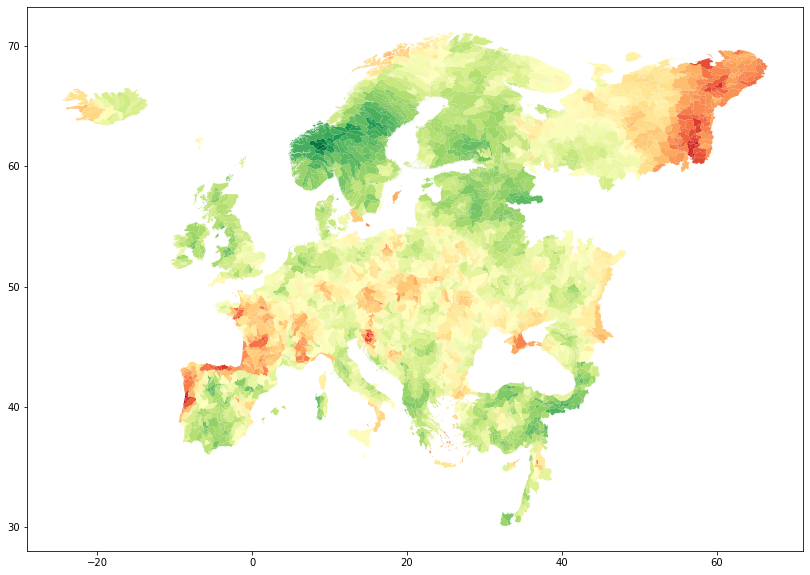

In [7]:
shp.plot(figsize=(16,10), column=df['198'], cmap='RdYlGn')

In [8]:
# Calculate centroids
shp['centroid'] = shp['geometry'].centroid

# Extract latitude and longitude
shp['LATITUDE'] = shp['centroid'].apply(lambda centroid: centroid.y)
shp['LONGITUDE'] = shp['centroid'].apply(lambda centroid: centroid.x)

# Drop the 'centroid' column if needed
shp = shp.drop('centroid', axis=1)

/var/folders/6b/j2xt7shx2fq5nt2p9y46s3lh0000gn/T/ipykernel_39798/1722491891.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp['centroid'] = shp['geometry'].centroid


In [9]:
df.insert(1, 'x', shp['LONGITUDE'])
#df['x'] = df['x'].astype(float)
df.insert(2, 'y', shp['LATITUDE'])
#df['y'] = df['y'].astype(float)

In [10]:
df.shape

(4062, 207)

In [11]:
def select_columns_by_months(dataframe, selected_months):
    selected_columns = []

    for i in range((dataframe.shape[1] - 3) // 12):
        selected_columns.extend([month + i * 12 for month in selected_months])

    all_columns = np.arange(1, dataframe.shape[1] - 2)
    columns_to_drop = np.setdiff1d(all_columns, np.array(selected_columns))
    columns_to_drop = [str(i) for i in columns_to_drop]

    filtered_dataframe = dataframe.drop(columns=columns_to_drop, axis=1)

    return filtered_dataframe

In [12]:
df_august = select_columns_by_months(df, [8])
df_august.shape

(4062, 20)

In [13]:
df_august_noNA = df_august.dropna()
df_august_noNA = df_august_noNA.reset_index(drop=True)
df_august_noNA.shape

(4039, 20)

In [14]:
shp_august_noNA = shp[shp['SUBID'].isin(df_august_noNA['SUBID'])]
shp_august_noNA = shp_august_noNA.reset_index(drop=True)
shp_august_noNA.shape

(4039, 18)

In [15]:
df_august_noNA

,SUBID,x,y,8,20,32,44,56,68,80,92,104,116,128,140,152,164,176,188,200
0,2070000010,32.296479,31.271897,-1.687005,-1.592269,-0.841407,-0.429750,-0.266884,-0.130311,0.322720,0.148163,-0.012349,0.714186,0.607188,0.763578,0.840773,0.981499,1.250072,1.320623,1.228164
1,2070000020,32.510856,30.455109,-1.531854,-1.197435,-0.516013,-0.158434,-0.013339,0.293185,0.289346,0.121995,-0.248463,0.805438,0.833308,0.850279,0.979692,0.862096,0.493823,0.101583,-0.147517
2,2070000030,33.063032,30.808122,-1.620268,-1.540479,-0.744793,-0.428128,-0.228600,-0.108894,0.234720,0.087788,-0.085651,0.758942,0.620076,0.708797,0.888112,1.332343,0.922608,1.174539,0.869266
3,2070816800,34.331646,30.693841,-0.869000,-0.831667,-0.848333,0.053000,-0.301333,-0.142667,-0.673000,-0.831667,-0.301333,-0.673000,0.211333,0.386333,0.758000,2.470000,1.977333,1.818667,0.942000
4,2070000250,34.240206,31.148776,-0.174209,-0.216162,-0.500267,0.060472,-0.411005,-0.066669,-0.649397,-0.768524,-0.967161,-0.782374,0.151465,-0.120841,0.095306,2.809839,1.224238,1.070481,0.367784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,2070099370,37.547854,34.882122,-0.721239,0.773922,0.773922,0.211211,0.678000,0.450263,-2.840614,-0.189237,-0.165104,-0.413857,0.007801,-0.318901,0.252931,1.329391,-0.582376,0.570425,0.703959
4035,2070099470,32.032950,37.074366,0.100777,-0.453272,-0.464238,-0.964030,-0.909491,-1.101425,-1.129313,0.124041,-0.243522,1.371384,1.355492,0.044738,0.827649,0.631294,0.873490,1.300537,1.080092
4036,2070099690,14.920174,45.307121,-0.593276,0.145253,-0.154496,-0.207290,-0.797760,0.217518,0.774469,0.509054,0.033695,0.532442,0.262362,0.414986,-0.821380,-2.331109,0.629384,0.955768,0.584246
4037,2070101800,5.817031,46.817488,0.253769,-1.527408,0.261170,-0.267211,-1.564467,0.075337,0.600915,0.466446,-0.322999,0.436630,1.024328,1.046571,-0.665959,-1.216614,0.238128,0.012552,-0.770768


100%|██████████| 17/17 [01:18<00:00,  4.62s/it]

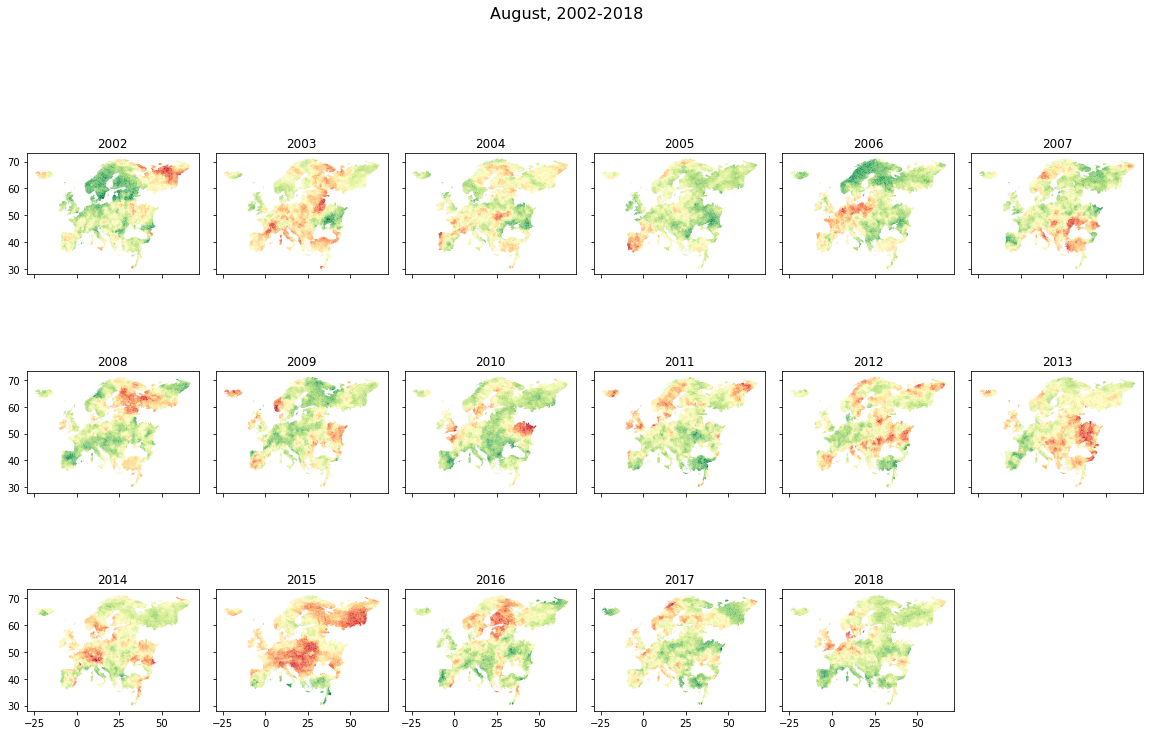

In [59]:
fig, axs = plt.subplots(3, 6, figsize=(20, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0.15, 'wspace' : 0.10})
fig.suptitle('August, 2002-2018', fontsize=16)

progress_bar = tqdm(total=17, position=0, leave=True, smoothing=0)

k=0
for i in range(2):
    for j in range(6):
        shp_august_noNA.plot(column=df_august_noNA.iloc[:, 3+k], ax=axs[i][j], cmap='RdYlGn')
        axs[i][j].set_title(f'{2002+k}', fontsize=12)
        k += 1
        progress_bar.update(1)
for j in range(5):
    shp_august_noNA.plot(column=df_august_noNA.iloc[:, 3+k], ax=axs[2][j], cmap='RdYlGn')
    axs[2][j].set_title(f'{2002+k}', fontsize=12)
    k += 1
    progress_bar.update(1)

plt.subplots_adjust(top=0.85)

fig.delaxes(axs[2,5])
#plt.savefig(fname='availability_each_month.png')
plt.show()


## Compute neighbours

In [16]:
# add neighbours column
shp_august_noNA["NEIGHBOURS"] = None  
    
progress_bar = tqdm(total=shp_august_noNA.shape[0], position=0, leave=True, smoothing=0)

for index, country in shp_august_noNA.iterrows():   
    #print(index)
    # get 'not disjoint' countries
    neighbours = shp_august_noNA[~shp_august_noNA.geometry.disjoint(country.geometry)]['SUBID'].tolist()

    # remove own name of the country from the list
    neighbours = [ name for name in neighbours if country['SUBID'] != name ]

    # add names of neighbours as neighbours value
    shp_august_noNA.at[index, "NEIGHBOURS"] = neighbours
                   
    progress_bar.update(1)  

  0%|          | 13/4039 [00:00<01:47, 37.39it/s]

100%|█████████▉| 4036/4039 [01:45<00:00, 38.18it/s]

In [62]:
shp_sep = shp_august_noNA.copy()

In [563]:
shp_sep['NEIGHBOURS'] = shp_august_noNA['NEIGHBOURS'].apply(lambda x: ', '.join(map(str, x)) if x else '')  # Convert elements to string

In [564]:
shp_sep.to_file("../data/shapefiles/FAPAN_neighbours/august_noNA_dropped3/august_noNA_dropped3_droppedduplicate.shp")

In [17]:
# Create a set to store unique pairs
unique_pairs = set()

# Iterate over each row and generate pairs
for index, row in shp_august_noNA.iterrows():
    subid = row['SUBID']
    neighbors = row['NEIGHBOURS']
    
    # Generate pairs and add to the set
    for neighbor in neighbors:
        pair = tuple(sorted([subid, neighbor]))
        unique_pairs.add(pair)

In [18]:
neighbours = []
progress_bar = tqdm(total=len(unique_pairs), position=0, leave=True, smoothing=0)

for couple in unique_pairs:
    subid_x_y = [f"{df_august_noNA.loc[df_august_noNA['SUBID'] == subid, 'x'].values[0]}_{df_august_noNA.loc[df_august_noNA['SUBID'] == subid, 'y'].values[0]}" for subid in couple]
    neighbours.append(tuple(subid_x_y))
    
    progress_bar.update(1)

 99%|█████████▉| 11040/11103 [00:27<00:00, 396.59it/s]

In [19]:
df_without_neighbours = shp_august_noNA[shp_august_noNA["NEIGHBOURS"].apply(len)==0][["LATITUDE", "LONGITUDE"]]
without_neighbours = ['{}_{}'.format(row['LONGITUDE'], row['LATITUDE']) for index, row in df_without_neighbours.iterrows()]

## Compute and visualize clusterings

In [20]:
df = df_august_noNA.copy()

transposed_df = df.T
df = pd.DataFrame(transposed_df.values, columns=[str(transposed_df.iloc[1, i]) + '_' + str(transposed_df.iloc[2, i]) for i in range(len(transposed_df.columns))])
df.drop([0, 1, 2], inplace=True)
df.reset_index(drop=True, inplace=True)

In [21]:
df = df.astype(float)

In [22]:
df.head()

,32.296478798287545_31.27189666211486,32.510855866130946_30.45510876556893,33.06303203853544_30.808121855442963,34.33164575500766_30.69384093111643,34.24020640768035_31.14877584408459,34.784029242235405_31.209245849757856,34.82373346803058_31.663351611696047,35.05637878102734_32.02956359215136,35.04554508740767_32.413631275338815,35.23116746785543_32.65608140020907,...,41.676616271143175_45.67808848620724,-1.496365276150773_38.854340406330856,14.9570871924975_45.90542726590697,31.86469682583647_37.074691885356984,32.688708205461_36.40015673552847,37.54785398297362_34.88212243346033,32.03295006777807_37.07436560514042,14.920173945528918_45.30712103069159,5.817030842545611_46.81748834607101,3.19907329590677_44.32240491143959
0,-1.687005,-1.531854,-1.620268,-0.869000,-0.174209,0.098456,0.180998,-0.076765,0.119929,0.274000,...,1.040750,-0.405807,0.754351,-0.073125,0.044085,-0.721239,0.100777,-0.593276,0.253769,-0.393404
1,-1.592269,-1.197435,-1.540479,-0.831667,-0.216162,0.074319,0.180221,-0.067298,-0.239670,-0.068296,...,0.976231,-0.251145,-0.559634,-0.573956,-0.428746,0.773922,-0.453272,0.145253,-1.527408,-1.523004
2,-0.841407,-0.516013,-0.744793,-0.848333,-0.500267,-0.276232,-0.211032,-0.351295,-0.232988,0.055718,...,1.322376,0.669880,0.643463,-0.577984,-0.653140,0.773922,-0.464238,-0.154496,0.261170,-1.114984
3,-0.429750,-0.158434,-0.428128,0.053000,0.060472,0.137160,-0.049283,-0.251904,-0.096655,-0.028427,...,0.333000,-1.756714,0.227730,-0.990872,-0.888573,0.211211,-0.964030,-0.207290,-0.267211,-1.564376
4,-0.266884,-0.013339,-0.228600,-0.301333,-0.411005,-0.196898,-0.019239,0.378116,0.476371,0.319020,...,0.273408,-0.396541,-0.446752,-0.877361,-0.757819,0.678000,-0.909491,-0.797760,-1.564467,-0.639414


df['13.9024_58.1193'] CONTIENE IL DUPLICATO

In [23]:
#df = df.loc[:,~df.columns.duplicated()]

In [24]:
def plot_clusters_shp(shapefile, clusters, figsize=(8,8)):
    shp = shapefile.copy()
    #shp = shp.drop("ClusterID", axis=1)
    #shp["CLUSTERID"] = 0  

    clusters_no_singletons = remove_singletons(clusters)
    singletons = clusters[len(clusters_no_singletons):]
    
    print(f'No. clusters (w/o singletons) = {len(clusters_no_singletons)}')
    print(f'No. singletons = {len(singletons)}')
        
    progress_bar = tqdm(total=shp.shape[0], position=0, leave=True, smoothing=0)

    clusterid = 0
    for cluster in clusters:
        for coordinate in cluster:
            coordinate = coordinate.split('_')
            shp.loc[((shp['LONGITUDE'] == float(coordinate[0])) & (shp['LATITUDE'] == float(coordinate[1]))), 'CLUSTERID'] = clusterid
                    
            progress_bar.update(1)
        
        clusterid += 1

    unique_cluster_ids = shp['CLUSTERID'].unique()
    num_unique_ids = len(unique_cluster_ids)
    seed_value = 45
    np.random.seed(seed_value)
    random_colors = np.random.rand(num_unique_ids, 3)  # RGB values

    # Create a dictionary to map CLUSTERID to its corresponding random color
    clusterid_to_color = dict(zip(unique_cluster_ids, random_colors))


    # Map each CLUSTERID to its corresponding random color

    shp['color'] = shp['CLUSTERID'].apply(lambda x: clusterid_to_color[x])

    shp.plot(figsize=figsize, color=shp['color'])

In [70]:
clusters_corr08 = compute_clusters(df, neighbours, without_neighbours, method='correlation', threshold=0.8)

Computing neighbours strengths...


  0%|          | 0/11103 [00:00<?, ?it/s]

100%|██████████| 11103/11103 [00:03<00:00, 2788.18it/s]


Neighbours strengths computed.
Computing clusters...


4256it [08:35,  8.26it/s]                          

Clusters computed.


No. clusters (w/o singletons) = 181
No. singletons = 97


  1%|▏         | 60/4039 [00:00<00:06, 594.46it/s]

100%|██████████| 4039/4039 [00:10<00:00, 389.73it/s]


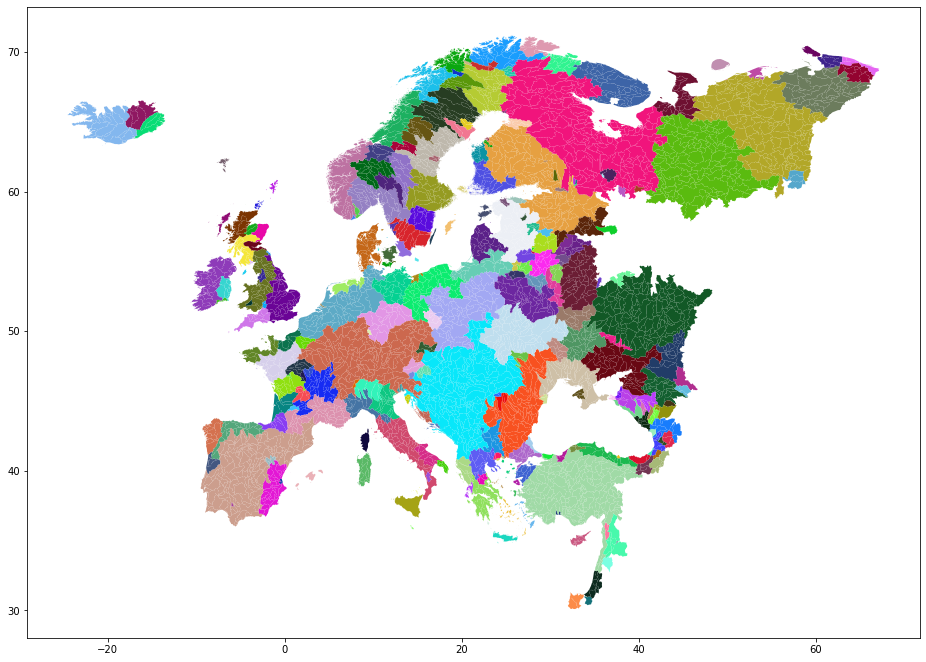

In [103]:
plot_clusters_shp(shp_august_noNA, clusters_corr08, figsize=(16,16))

In [104]:
clusters_corr085 = compute_clusters(df, neighbours, without_neighbours, method='correlation', threshold=0.85)

Computing neighbours strengths...


100%|██████████| 11103/11103 [00:02<00:00, 3714.81it/s]


Neighbours strengths computed.
Computing clusters...


4478it [08:10,  9.14it/s]                          

Clusters computed.


No. clusters (w/o singletons) = 298
No. singletons = 134


100%|██████████| 4039/4039 [00:06<00:00, 587.65it/s] 


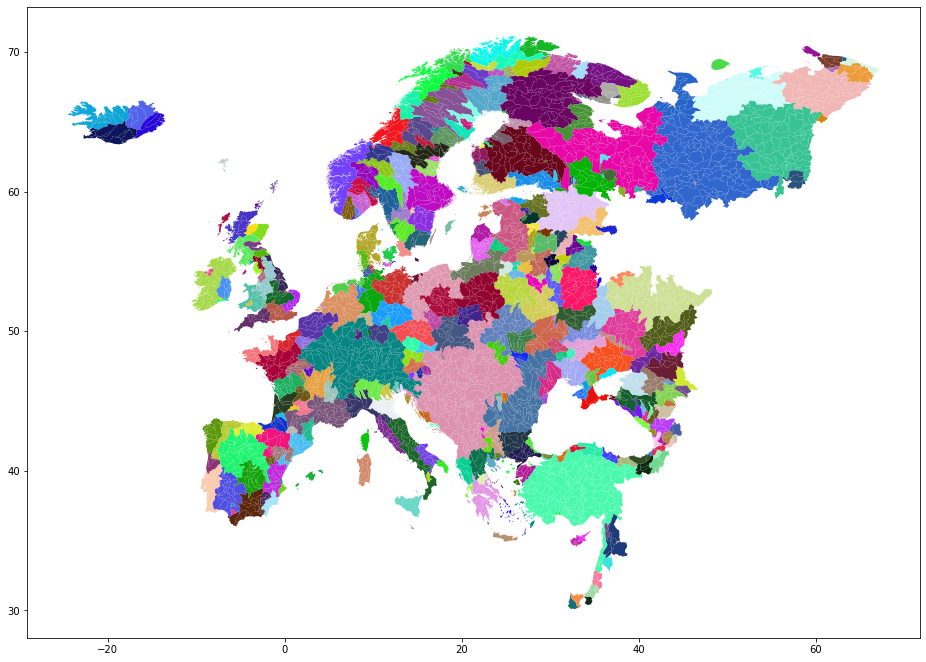

In [105]:
plot_clusters_shp(shp_august_noNA, clusters_corr085, figsize=(16,16))

In [106]:
clusters_corr09 = compute_clusters(df, neighbours, without_neighbours, method='correlation', threshold=0.9)

Computing neighbours strengths...


100%|██████████| 11103/11103 [00:01<00:00, 6017.76it/s]


Neighbours strengths computed.
Computing clusters...


5067it [07:46, 10.85it/s]                          

Clusters computed.


No. clusters (w/o singletons) = 515
No. singletons = 279


100%|██████████| 4039/4039 [00:06<00:00, 633.69it/s] 


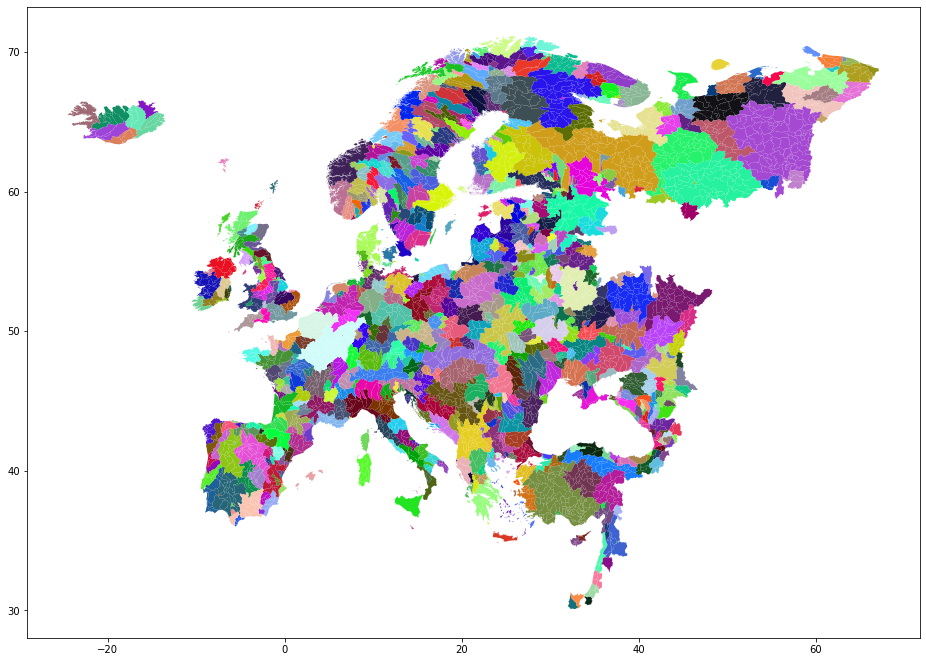

In [107]:
plot_clusters_shp(shp_august_noNA, clusters_corr09, figsize=(16,16))

In [26]:
clusters_complete_corr08 = compute_clusters(df, neighbours, without_neighbours, method='complete_correlation', threshold=0.8)

Computing neighbours strengths...


  1%|          | 80/11103 [00:00<00:13, 798.20it/s]

100%|██████████| 11103/11103 [00:05<00:00, 2018.19it/s]


Neighbours strengths computed.
Computing clusters...


5197it [12:59,  6.67it/s]                          s] 

Clusters computed.


No. clusters (w/o singletons) = 741
No. singletons = 106


100%|██████████| 4039/4039 [00:06<00:00, 604.07it/s] 


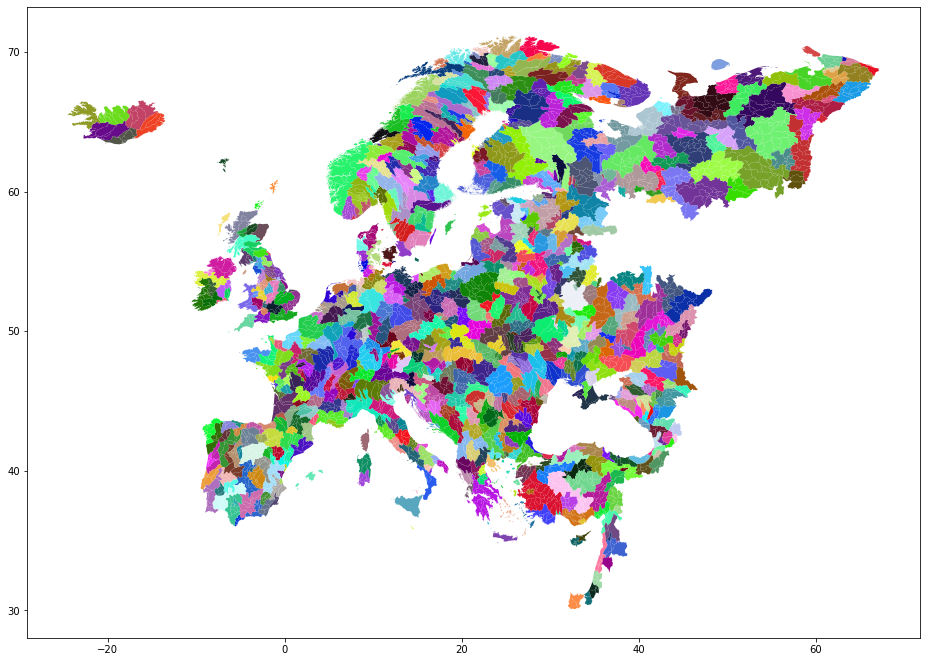

In [27]:
plot_clusters_shp(shp_august_noNA, clusters_complete_corr08, figsize=(16,16))

In [28]:
clusters_complete_corr085 = compute_clusters(df, neighbours, without_neighbours, method='complete_correlation', threshold=0.85)

Computing neighbours strengths...


100%|██████████| 11103/11103 [00:02<00:00, 5256.90it/s]


Neighbours strengths computed.
Computing clusters...


5631it [17:02,  5.51it/s]                          


Clusters computed.


No. clusters (w/o singletons) = 932
No. singletons = 161


100%|██████████| 4039/4039 [00:06<00:00, 621.24it/s] 


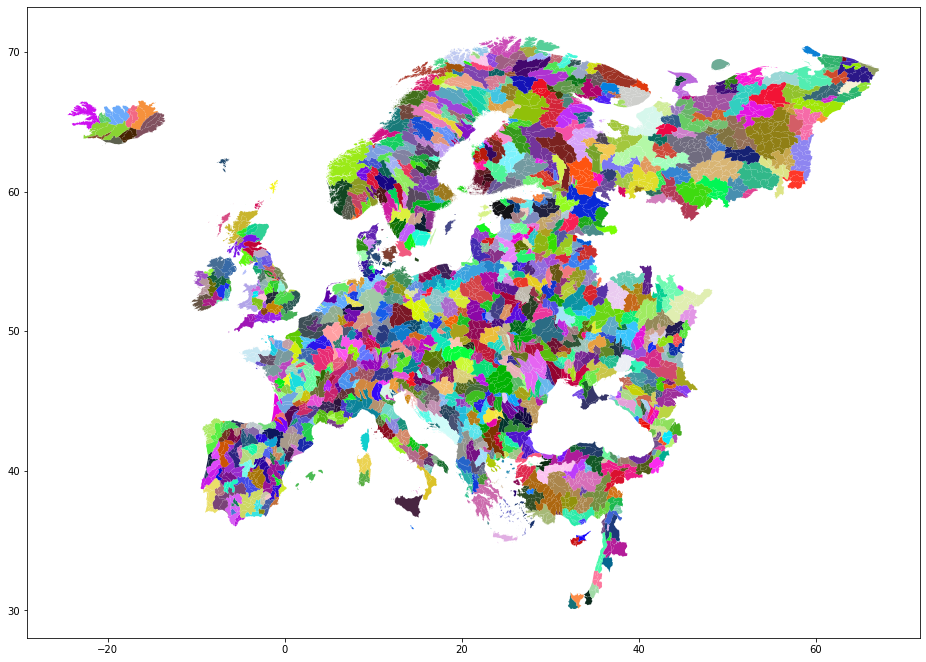

In [29]:
plot_clusters_shp(shp_august_noNA, clusters_complete_corr085, figsize=(16,16))

In [30]:
clusters_complete_corr09 = compute_clusters(df, neighbours, without_neighbours, method='complete_correlation', threshold=0.9)

Computing neighbours strengths...


100%|██████████| 11103/11103 [00:01<00:00, 5987.68it/s]


Neighbours strengths computed.
Computing clusters...


6425it [06:46, 15.79it/s]                          

Clusters computed.


No. clusters (w/o singletons) = 1151
No. singletons = 394


100%|██████████| 4039/4039 [00:05<00:00, 703.24it/s] 


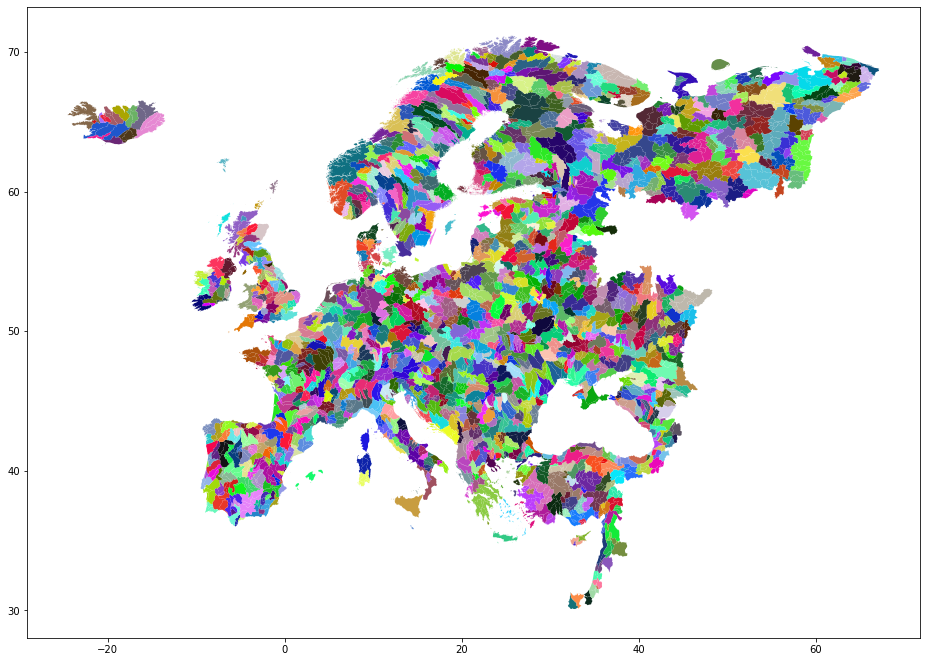

In [31]:
plot_clusters_shp(shp_august_noNA, clusters_complete_corr09, figsize=(16,16))